## CNN을 이용한 흑백 이미지 분류

### Step 1. Task 설정
분석할 데이터: Fashion MNIST
- 라벨 있음 -> 지도학습
- 라벨 종류 -> discrete variable -> 분류분석
- 라벨 수: 10 -> 다중분류

In [16]:
# 필요한 모듈 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

### Step 2. 데이터셋 준비하기
- Fashion MNIST는 운동화, 셔츠, 샌들, 가방, 구두 등 패션이미지들을 모아둔 데이터셋
- 이미지: 각 28*28픽셀, grayscale 이미지임(색상이 없는 2D 이미지)
- 샘플수: 총 70,000(훈련셋 60,000, 테스트셋 10,000)
- 총 10가지의 class가 있음(클래스별 7천개)

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [18]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

### 데이터 전처리
정규화.   
이미지 데이터(0~255)값을 가짐.   
- 픽셀 내 색상값을 255로 나누어 준다. : 0~1 값을 가지게 됨

In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
x_train.shape

(60000, 28, 28)

### 컨볼루션 함수의 특징
- 기본적으로 3D 데이터를 받아옴
- 회색조 이미지(2D)를 처리하기 위해서 차원 확장을 해줌

In [21]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [22]:
# 라벨 수 확인
K = len(set(y_train))
K

10

In [23]:
y_train
# sparse category 형식이다. 원핫인코딩이 아닌

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Step 3. 모델 훈련하기

In [24]:
x_train[0].shape

(28, 28, 1)

In [25]:
# Stage 1. Convolution <- feature 추출
# 입력 레이어의 크기 설정
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

In [26]:
x = Flatten()(x)

In [27]:
x = Dropout(0.2)(x)

In [28]:
# Stage 2. ANN
x = Dense(512, activation='relu')(x)

# Output
x = Dense(K, activation='softmax')(x)
# Output 노드의 개수는 다중분석일 경우 라벨의 수로 함
# 다중분석에서 Sparse Category 이므로 activation은 softmax

model = Model(i,x)

In [29]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [30]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7465 - loss: 0.6898 - val_accuracy: 0.8469 - val_loss: 0.4033
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8599 - loss: 0.3752 - val_accuracy: 0.8651 - val_loss: 0.3527
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8816 - loss: 0.3158 - val_accuracy: 0.8789 - val_loss: 0.3249
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8946 - loss: 0.2750 - val_accuracy: 0.8867 - val_loss: 0.3131
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9045 - loss: 0.2531 - val_accuracy: 0.8925 - val_loss: 0.3040
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9130 - loss: 0.2291 - val_accuracy: 0.8947 - val_loss: 0.2955
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9191 - loss: 0.2101 - val_accuracy: 0.9001 - val_loss: 0.2810
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9310 - loss: 0

### Step 4. 모델 평가

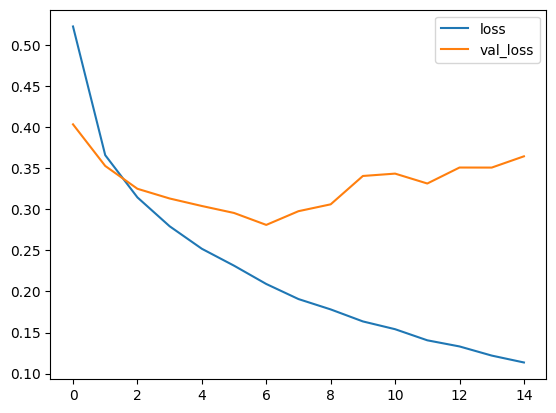

In [31]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
# epoch 4 전후로 과적합 발생

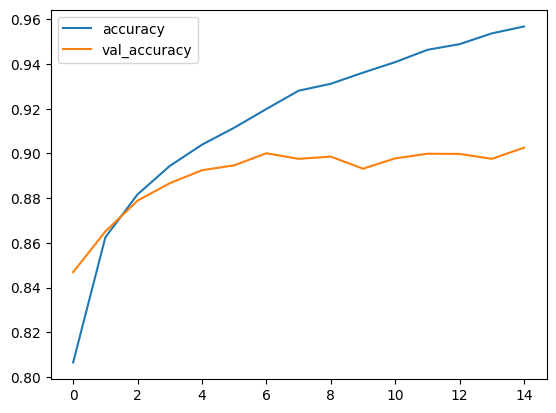

In [32]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[841   0  30  24   3   1  91   0   9   1]
 [  0 975   0  16   3   0   3   0   3   0]
 [ 17   0 863   6  54   0  59   0   1   0]
 [ 17   4  22 913  20   0  24   0   0   0]
 [  0   3  49  20 869   0  57   0   2   0]
 [  0   0   0   1   0 978   0  11   1   9]
 [ 95   1  77  23 101   0 691   0  12   0]
 [  0   0   0   0   0  16   0 961   0  23]
 [  1   1   1   2   6   3   6   2 978   0]
 [  1   0   0   0   0   7   0  34   1 957]]


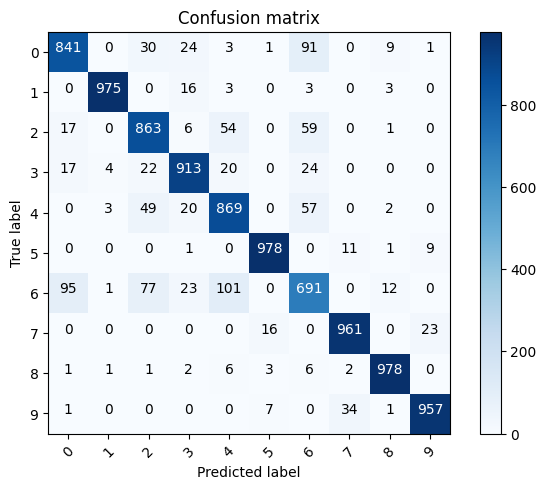

In [33]:
# 오차행렬 시각화 하기
from sklearn.metrics import confusion_matrix
import itertools
# 데이터 구조를 하나하나 훑어보기 위한 모듈

# 오차행렬을 출력하고 시각화 까지 해 주는 사용자 정의 함수를 설정한다
# 단순히 갯수로 출력하는 것이 아니라 % 로 출력하고 싶다면 normalize=True 로 바꾸어 준다
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [34]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

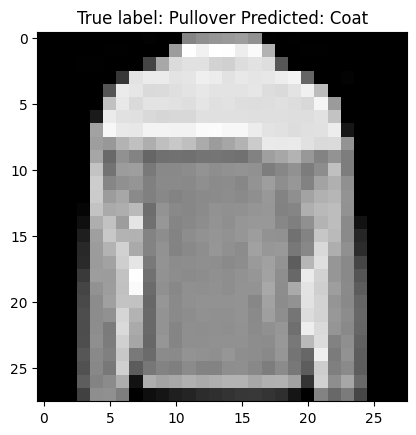

In [35]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

### Regularization(정규화)

Regularization 기법들
- Dropout
- L1, L2 규제
- Data augmentation
- Early Stopping
- Batch Normalization

#### L1, L2 규제
L1 규제
- 규제가 절대값을 가진다. -> 규제보다 낮은 값을 가지는 가중치가 0이 되어 버린다.
- 중요하지 않은(가중치 값이 낮은) 변수의 영향력이 0이 된다.
- 어느 변수가 중요한지 모를때, 쓸데없는 변수가 너무 많이 섞여있을때   

L2 규제
- 규제값이 상대적이다. -> 가중치가 적은 변수도 버리지 않는다.
- 제곱값이다. -> 가중치가 높을수록 더 큰 규제를 적용한다. -> 이상치에 강하다.

In [36]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
# GPU 사용여부 체크
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7853638237198163508
xla_global_id: -1
]


<Figure size 640x480 with 0 Axes>

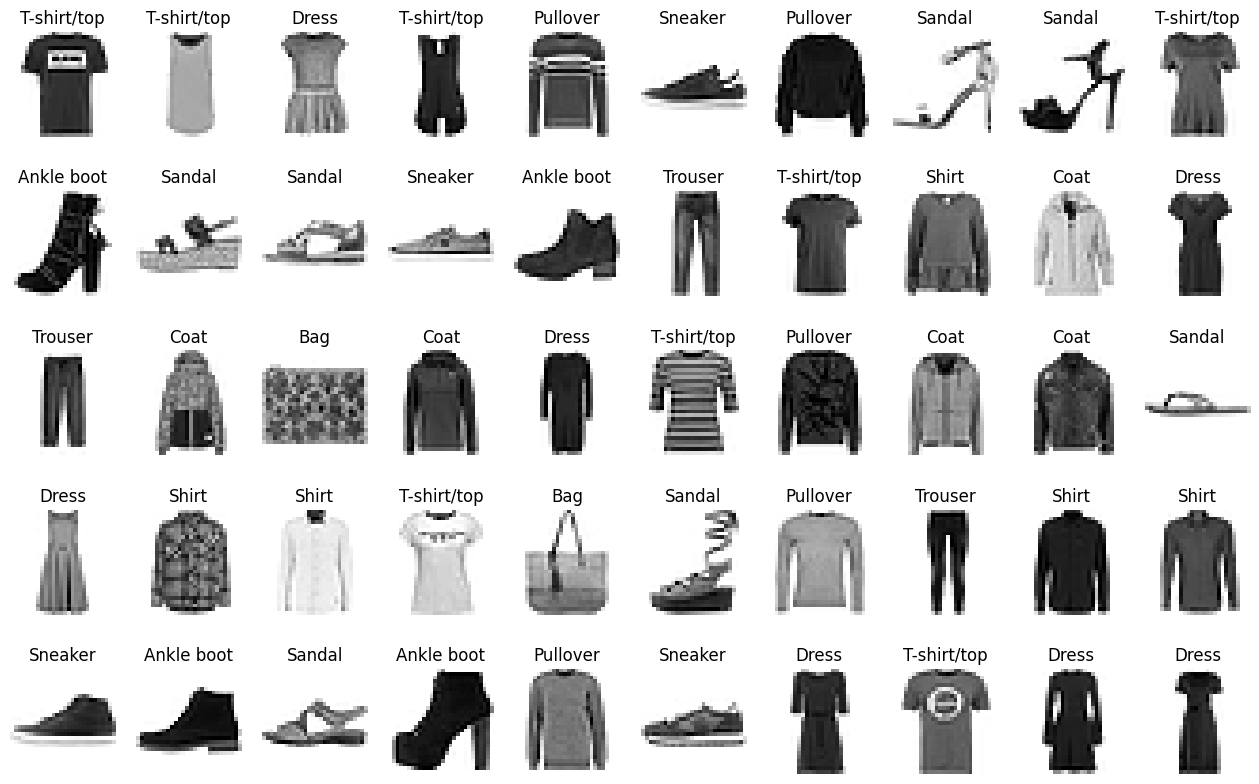

In [38]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50

for i in range(1, num_of_images+1):
    class_names = classes[y_train[i]]
    plt.subplot(5,10,i).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray_r')

#### Data augmentation. 데이터 증강.
가상의 데이터를 추가해서 실제 데이터 추가 수집없이 모델의 학습률을 높임

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras import backend as K

In [40]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# 데이터 타입을 float으로 변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [41]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
img_rows, img_cols

(28, 28)

In [42]:
input_shape = (img_rows, img_cols, 1)
x_test /= 255.0

#### 라벨값 one-hot-encoding 하기.

"shirt"
- category : [0,0,0,0,0,0,1,0,0,0]
- sparse category : 6

In [43]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[1]

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

In [46]:
L2 = 0.001

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation = 'relu',
                 kernel_regularizer = regularizers.l2(L2),
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(L2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(L2)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001, momentum=0.9),
              metrics = ['accuracy'])

model.summary()

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,266 (4.58 MB)

 Trainable params: 1,200,074 (4.58 MB)

 Non-trainable params: 192 (768.00 B)

In [49]:
# Define Data Generator for Augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
)

# Here we fit the data generator to some sample data.
# train_datagen.fit(x_train)

batch_size = 32
epochs = 15

# Fit the model
# Notice we use train_datagen.flow, this takes data & label arrays, generates batches of augmented data.
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs = epochs,
                    validation_data = (x_test, y_test),
                    verbose = 1,
                    steps_per_epoch = x_train.shape[0] // batch_size)

# We obtain our accuracy ascore using the evaluate function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/15
   2/1875 ━━━━━━━━━━━━━━━━━━━━ 1:37 52ms/step - accuracy: 0.1172 - loss: 3.9200

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6681 - loss: 1.2168 - val_accuracy: 0.8032 - val_loss: 0.7885
Epoch 2/15


c:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8032 - val_loss: 0.7885
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7750 - loss: 0.8670 - val_accuracy: 0.8358 - val_loss: 0.7132
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8358 - val_loss: 0.7132
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8025 - loss: 0.7855 - val_accuracy: 0.8547 - val_loss: 0.6475
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8547 - val_loss: 0.6475
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.8144 - loss: 0.7348 - val_accuracy: 0.8609 - val_loss: 0.6185
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8609 - val_loss: 0.6185
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accur

AttributeError: 'str' object has no attribute 'score'

In [50]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.49943119287490845
Test accuracy: 0.8884000182151794
